#### HYPOTHESIS TESTING

<br>

## FetchMaker

<hr>

FetchMaker’s mission is to match up prospective dog owners with their perfect pet.

<br>

FetchMaker has provided us with data for a sample of dogs from their app, including the following attributes:
- `weight` (int) represents how heavy a dog is in pounds
- `tail_length` (float) represents tail length in inches
- `age` (int) in years
- `color` (string) represents color of dog's fur
- `is_rescue` (boolean) determines if the dog is a rescue (`1`) or not (`0`)

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom_test, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

### Data to the Rescue

In [3]:
dogs = pd.read_csv('dog_data.csv')
dogs.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua


In [4]:
# shows rows that only contain whippets, terriers, and pitbulls
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]
dogs_wtp.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
200,0,71,5.74,4,black,0,0,Charlot,pitbull
201,0,26,11.56,3,black,0,0,Jud,pitbull
202,0,56,10.76,4,black,0,0,Rosamund,pitbull
203,0,33,6.32,4,black,1,0,Ruthann,pitbull
204,0,54,17.18,4,black,1,1,Bryon,pitbull


In [5]:
# shows rows that only contain poodles and shihtzus
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]
dogs_ps.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
300,0,58,8.05,1,black,1,0,Moise,poodle
301,0,56,9.44,4,black,1,0,Boote,poodle
302,1,59,4.04,4,black,1,0,Beatrix,poodle
303,0,70,12.37,1,black,1,0,Rabbi,poodle
304,0,52,11.42,2,black,0,0,Tallou,poodle


In [8]:
#finds all the is_rescue column that are 'whippet' breed
whippet_rescue = dogs.is_rescue[dogs.breed == 'whippet']
print(whippet_rescue)

700    0
701    0
702    0
703    0
704    0
      ..
795    0
796    0
797    0
798    0
799    0
Name: is_rescue, Length: 100, dtype: int64


In [9]:
#finds the sum of all the whippet rescues that are equal to 1
num_whippet_rescues = np.sum(whippet_rescue == 1)
print(num_whippet_rescues)

6


In [10]:
#this is the total number of whippets in the is_rescue column (regardless of 0 or 1)
num_whippets = len(whippet_rescue)
print(num_whippets)

100


FetchMaker estimates (based on historical data for all dogs) that 8% of dogs in their system are rescues. We want to know if 8% of whippets are rescues.

<br>

<b>Null: </b>8% of whippets are rescues <br>
<b>Alternative: </b>more or less than 8% of whippets are rescues

In [14]:
#use binom_test since it's dealing w/ binary category & comparing a sample statistic
pval = binom_test(x = num_whippet_rescues, n = num_whippets, p = 0.08, alternative = 'two-sided')
print("p-value: " + str(pval))
print("Do not reject the null hypothesis. We can say that 8% of rescues are whippets.")

p-value: 0.5811780106238098
Do not reject the null hypothesis. We can say that 8% of rescues are whippets.


### Mid-Sized Dog Weights

In [15]:
wt_whippets = dogs.weight[dogs.breed == 'whippet']
#print(wt_whippets)
wt_terriers = dogs.weight[dogs.breed == 'terrier']
#print(wt_terriers)
wt_pitbulls = dogs.weight[dogs.breed == 'pitbull']
#print(wt_pitbulls)

Is there a significant difference in the average weights of these three dog breeds?

<br>

<b>Null: </b>whippets, terriers, and pitbulls all weigh the same amount on average <br>
<b>Alternative: </b>whippets, terriers, and pitbulls <b>do not</b> all weigh the same amount on average (at least one pair of breeds has differing average weights)

In [17]:
#use ANOVA
fstat, pval = f_oneway(wt_whippets, wt_terriers, wt_pitbulls)
print("p-value: {:.20f}".format(float(pval)))
print("Reject the null hypothesis. Those 3 breeds do not all weigh the same amount on average.")

p-value: 0.00000000000000003276
Reject the null hypothesis. Those 3 breeds do not all weigh the same amount on average.


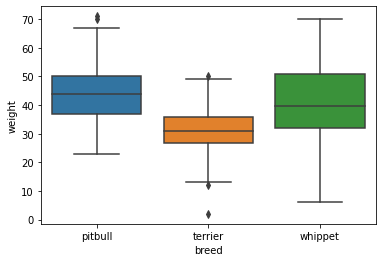

In [26]:
sns.boxplot(data = dogs, x = dogs_wtp.breed, y = dogs_wtp.weight)
plt.show()

In [21]:
#use Tukey's Test since pval is less than 0.05
tukey_results = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed, 0.05)
print(tukey_results)
print("For any pair where reject = 'True', those 2 breeds weigh significantly different amounts (i.e. pitbull vs. terrier, and terrier vs. whippet).")

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
pitbull terrier   -13.24  0.001 -16.728 -9.752   True
pitbull whippet    -3.34 0.0639  -6.828  0.148  False
terrier whippet      9.9  0.001   6.412 13.388   True
-----------------------------------------------------
For any pair where reject = 'True', those 2 breeds weigh significantly different amounts (i.e. pitbull vs. terrier, and terrier vs. whippet).


### Poodle and Shihtzu Colors

In [23]:
Xtab = pd.crosstab(dogs_ps.breed, dogs_ps.color)
print(Xtab)

color    black  brown  gold  grey  white
breed                                   
poodle      17     13     8    52     10
shihtzu     10     36     6    41      7


Fetchmaker wants to know if poodles and shihtzus come in different colors.

<br>

<b>Null: </b>There is an association between breed (poodle vs. shihtzu) and color. <br>
<b>Alternative: </b>There is not an association between breed (poodle vs. shihtzu) and color.

In [25]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval)
print("Reject the null hypothesis. There is a significant difference in color combinations between poodles and shihtzus.")

0.005302408293244597
Reject the null hypothesis. There is a significant difference in color combinations between poodles and shihtzus.
